In [2]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/drug200.csv")

In [5]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [6]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Data Preprocessing

In [7]:
data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [10]:
data[data.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [12]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [13]:
data.shape

(200, 6)

Sex
M    104
F     96
Name: count, dtype: int64


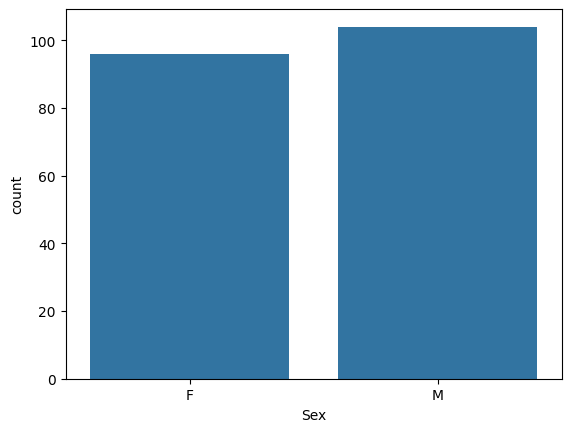

In [14]:
x = data['Sex'].value_counts()
print(x)
p = sns.countplot(x = data['Sex'])
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


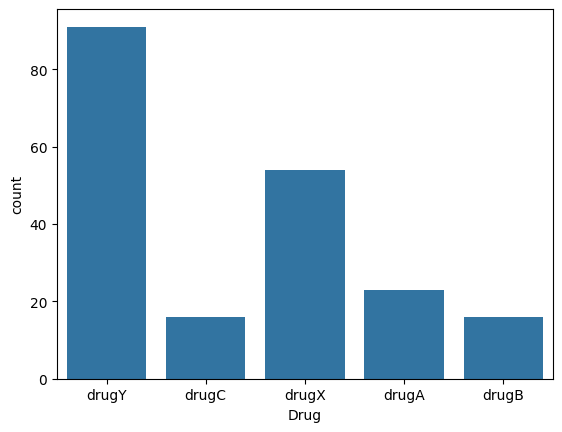

In [15]:
x = data['Drug'].value_counts()
print(x)
p = sns.countplot(data, x = 'Drug' )
plt.show()

In [16]:
data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

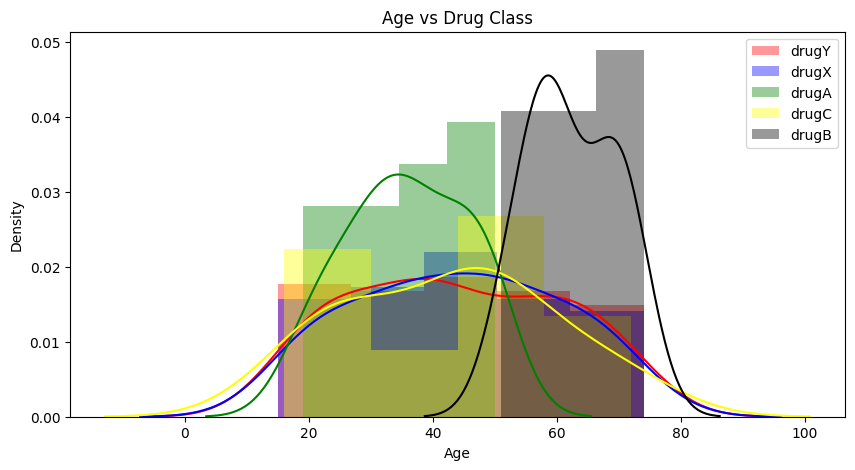

In [17]:
#Create graph
plt.figure(figsize=(10,5))
sns.distplot(data[data['Drug']=='drugY']['Age'],color = 'red',label = 'drugY')
sns.distplot(data[data['Drug']=='drugX']['Age'],color = 'blue',label = 'drugX')
sns.distplot(data[data['Drug']=='drugA']['Age'],color = 'green',label = 'drugA')
sns.distplot(data[data['Drug']=='drugC']['Age'],color = 'yellow',label = 'drugC')
sns.distplot(data[data['Drug']=='drugB']['Age'],color = 'black',label = 'drugB')
plt.legend()
plt.title('Age vs Drug Class')
plt.show()

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data[['BP','Sex','Cholesterol','Drug']] = oe.fit_transform(data[['BP','Sex','Cholesterol','Drug']])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [21]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [22]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [23]:
y

,Drug
0,4.0
1,2.0
2,2.0
3,3.0
4,4.0
...,...
195,2.0
196,2.0
197,3.0
198,3.0


In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [26]:
y_train

,Drug
79,3.0
197,3.0
38,3.0
24,4.0
122,4.0
...,...
106,3.0
14,3.0
92,4.0
179,4.0


Decision Tree Algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_pred_gini = dt.predict(X_test)

In [29]:
y_pred_gini

array([3., 4., 3., 2., 4., 4., 4., 3., 0., 3., 0., 3., 4., 0., 1., 4., 1.,
       3., 2., 4., 1., 3., 3., 4., 4., 4., 2., 3., 4., 3., 4., 2., 2., 4.,
       0., 4., 3., 0., 4., 0.])

In [30]:
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(y_test,y_pred_gini))

Accuracy Score : 1.0


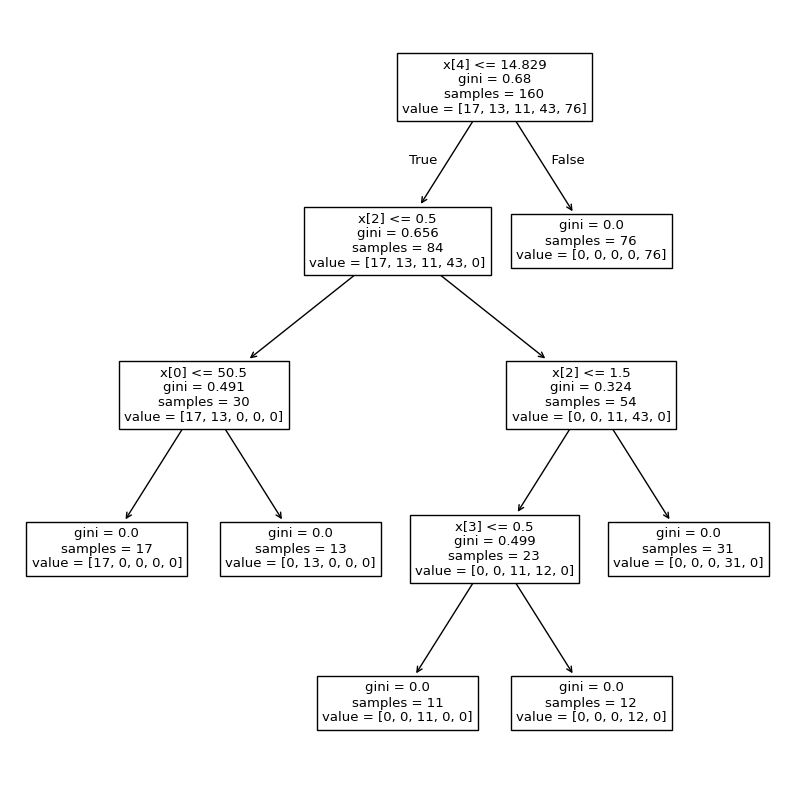

In [31]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(dt.fit(X_train,y_train))
plt.show()

In [32]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 100,max_depth = 3)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [33]:
y_pred_entropy = clf_entropy.predict(X_test)
print('Accuracy Score(Entropy) :' ,accuracy_score(y_test,y_pred_entropy))

Accuracy Score(Entropy) : 0.875


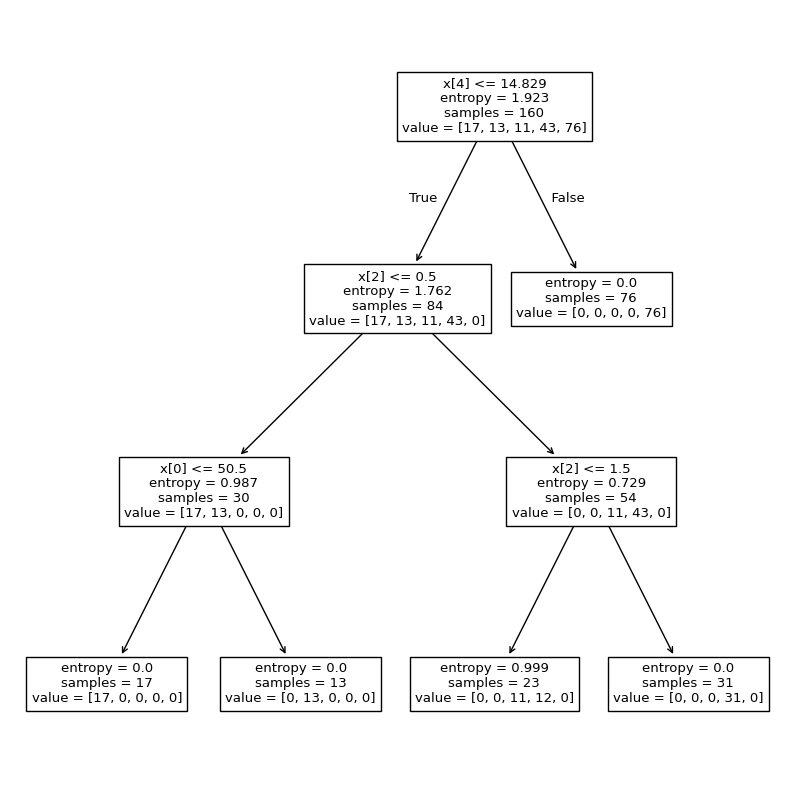

In [34]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(X_train,y_train))
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_pred = dt.predict(X_test)

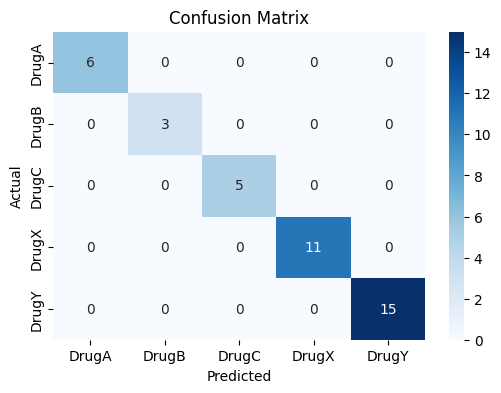

In [36]:
cm = confusion_matrix(y_test,y_pred_gini)
plt.figure(figsize=(6,4))
class_labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

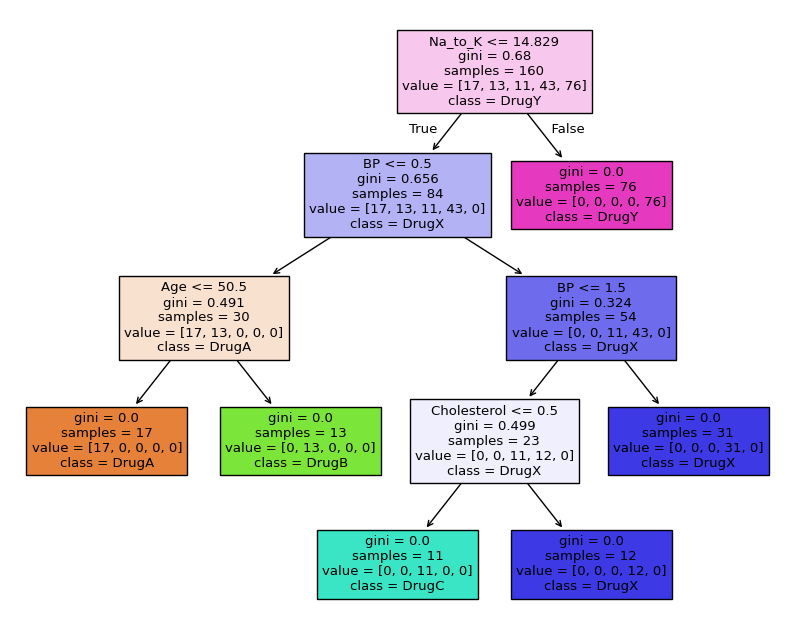

In [37]:
class_labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]  # Replace with actual labels
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=x.columns, class_names=class_labels, filled=True)
plt.show()

In [38]:
print(dt)

DecisionTreeClassifier(random_state=0)


In [39]:
import pickle

# Assuming 'dt' is your trained DecisionTreeClassifier model
DecisionTreeClassifier = 'decision_tree_model.pkl'

# Open a file in binary write mode and save the model
with open(DecisionTreeClassifier, 'wb') as file:
    pickle.dump(dt, file)

print(f"Model saved to {DecisionTreeClassifier}")

Model saved to decision_tree_model.pkl
